# Prueba individual 2

Importo las librerias a utilizar, que son pandas y matplotlib.pyplot, y , les pongo sus respectivas iniciales para poder llamarlos de manera mas eficiente.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Importo el archivo train

In [2]:
#import csv
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";")

Saving train.csv to train (1).csv


Importo el archivo test

In [8]:
#import csv
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df_test = pd.read_csv(name, sep=";")

Saving test.csv to test.csv


Las primeras columnas de test

In [14]:
print(df.head(4600))

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

Las primeras columnas de test

In [15]:
print(df_test.head(4600))

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

Como se puede apreciar en ambas tablas, tanto el train como el test, cuentan con 4521 datos en 17 columnas, por lo cual, siendo una gran cantidad de datos estos se pueden trabajar y entrenar, puesto que si fueran mas seria muy complejo (pero preciso) y si fueran menos podria llegar a ser impreciso y hasta incoherente

# Balance por Trabajo

In [18]:
resultados = df.groupby(['job']).agg({
    'balance': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()
resultados.head(4600)

job      balance                                 
                          mean median          std   min    max
0          admin.  1226.736402  430.0  2370.119128  -967  22171
1     blue-collar  1085.161734  408.5  2040.218220 -1400  16353
2    entrepreneur  1645.125000  365.5  4441.303620 -2082  42045
3       housemaid  2083.803571  296.5  4603.836647  -759  26965
4      management  1766.928793  577.0  3267.733077 -1746  27359
5         retired  2319.191304  672.5  5846.379889 -1206  71188
6   self-employed  1392.409836  483.0  2479.640999 -3313  16430
7        services  1103.956835  288.0  2445.239976 -1202  26394
8         student  1543.821429  422.5  2579.886671  -230  11555
9      technician  1330.996094  434.5  2630.253390 -1680  27733
10     unemployed  1089.421875  473.5  1692.267628  -872   9019
11        unknown  1501.710526  655.5  1957.258258     0   7337

Como se puede apreciar en la tabla anterior, en la cual podemos ver cuales son los balances minimos y maximos de los distintos trabajos, por otra parte podemos ver los promedios, en el cual podemos ver que housemaid y retired son los que tienen un balance promedio superior, ademas de que podemos ver que la mediade de retired y desconocido son las mas altas, teniendo 672,5 y 655,5 respectivamente, lo que implica que el 50% tienen un salario menor a esto.

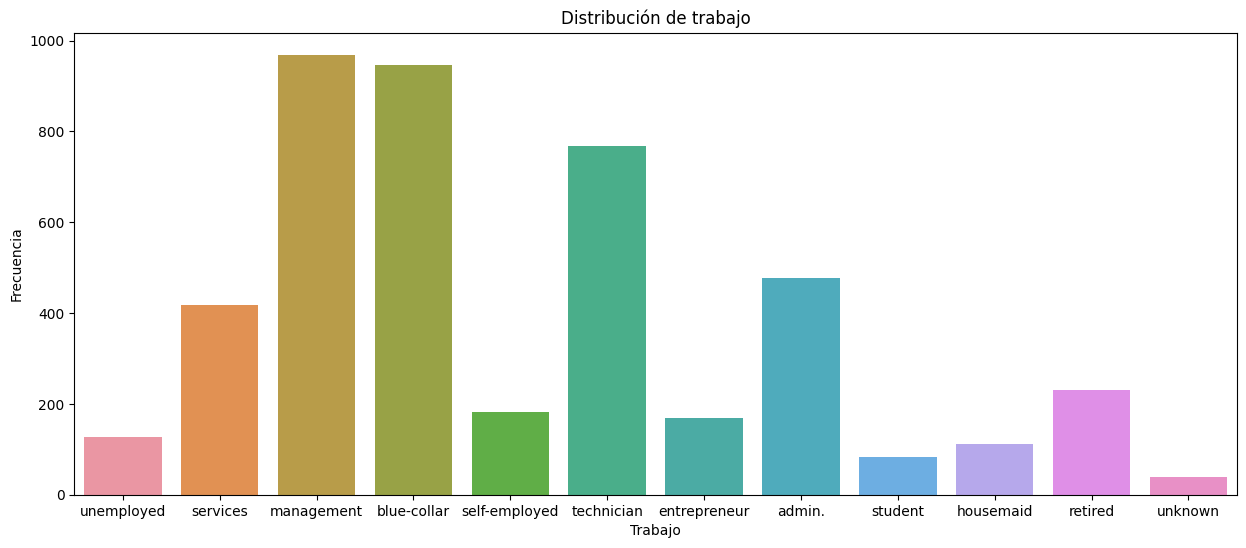

In [27]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='job')
plt.xlabel('Trabajo')
plt.ylabel('Frecuencia')
plt.title('Distribución de trabajo')
plt.show()

Como se puede apreciar en el grafico, los trabajos en los que se pueden apreciar mas personas, son en los trabajos de managment y blue-collar, seguidos por technician y admin, por otra parte se puede ver que los trabajos con menos usuarios son unknown y student.

# Balance por vivienda

In [28]:
resultados_vivienda = df.groupby(['housing']).agg({
    'balance': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()
resultados_vivienda.head(4600)

housing      balance                                 
                  mean median          std   min    max
0      no  1595.277268  455.0  3440.846457 -2082  71188
1     yes  1290.309496  440.0  2624.641819 -3313  27733

Como se puede apreciar en la tabla se puede apreciar que el balance de los usuarios que no poseen propiedad, es mayor a los que ya tienen una casa, esto se puede apreciar en los minimos y maximos de ambas tablas, ya que el minimo (negativo) de los que no poseen casa propia, es mayor al de los que si tienen, por lo que se puede deducir que las personas que poseen casa propia, tienen una mayor cantidd de gastos, por otro lado, la mediana de estos no llega a ser muy distinta, con tan solo 15 dolares de diferencia a favor de los que no poseen casa, lo que significa que el 50% de las personas tienden a tener un balance de 455 o menos, por su parte el promedio de los que poseen casa es mayor por mas de 305 dolares, por lo que se puede decir que tienen un balance promedio mejor a los que tienen casa propia.

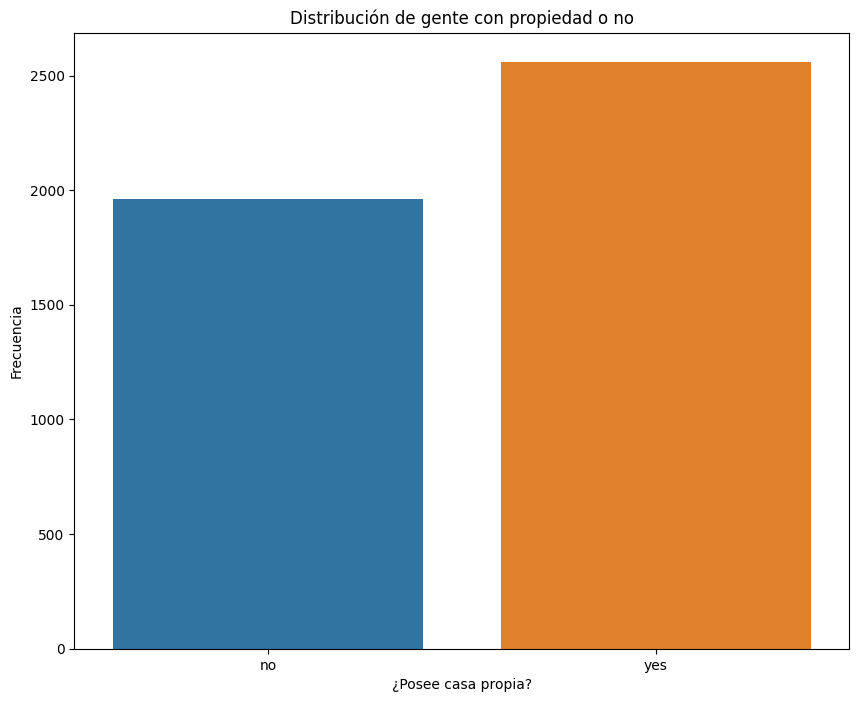

In [31]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='housing')
plt.xlabel('¿Posee casa propia?')
plt.ylabel('Frecuencia')
plt.title('Distribución de gente con propiedad o no')
plt.show()

In [33]:
conteo_housing = df['housing'].value_counts()
print("Cantidad de gente con propiedad:", conteo_housing[0])
print("Cantidad de gente sin propiedad:", conteo_housing[1])

Cantidad de gente con propiedad: 2559
Cantidad de gente sin propiedad: 1962


Por lo que se puede apreciar en el grafico, las distribuciones por propiedad, se puede ver que la mayor parte de la gente tiende a tener casa propia, pero esta es una difencia de 597, por lo que la gente con casa en comparacion a la sin casa propia es de al mas de un 14% más. Viendo estos datos, podemos entender que la mayoria de las personas tienen balances promedio de 1290, ya que aproximadamente el 60% de las personas de encuentran en que si poseen casa propia

# Balance por estado civil

In [34]:
resultados_vivienda = df.groupby(['marital']).agg({
    'balance': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()
resultados_vivienda.head(4600)

marital      balance                                 
                    mean median          std   min    max
0  divorced  1122.390152  367.5  2199.922010 -1148  26306
1   married  1463.195567  452.0  3188.571513 -3313  71188
2    single  1460.414716  462.0  2879.810214 -1313  27733

Como se puede apreciar en la tabla la gente casa tiende a tener promedios mas altos, y la gente divorciada tiende a tener medianas mas bajas, por lo que se puede intuir que estos tienden a tener menor balance, ademas por otro lado tienden a tener un balance minimo menor, y no poseer tanto acceso a creditos

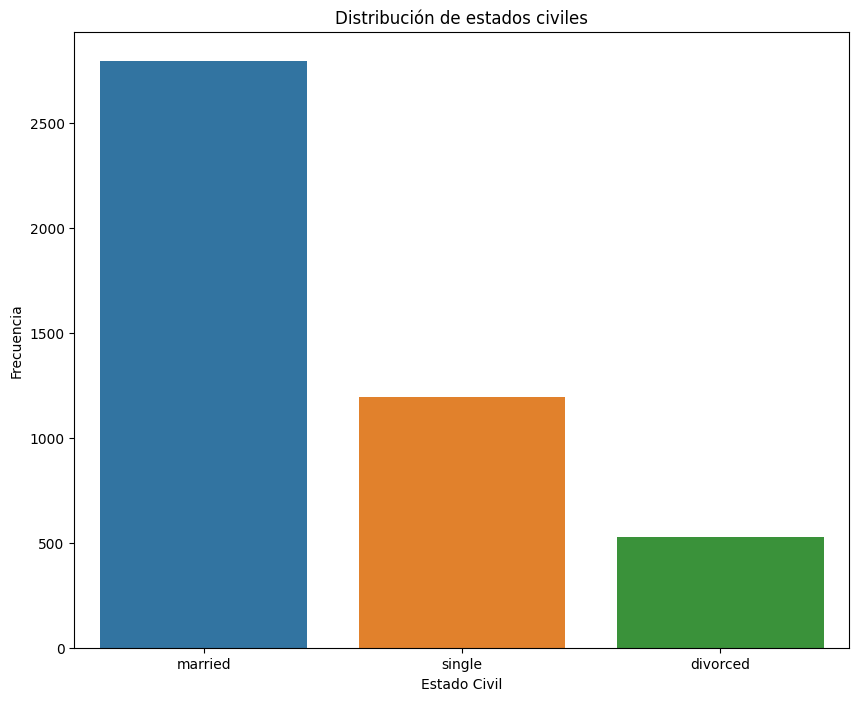

In [36]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='marital')
plt.xlabel('Estado Civil')
plt.ylabel('Frecuencia')
plt.title('Distribución de estados civiles')
plt.show()

In [43]:
conteo_marital = df['marital'].value_counts()
print("Cantidad de gente casada:", conteo_marital[0])
print("Cantidad de gente soltera:", conteo_marital[1])
print("Cantidad de gente divorciada:", conteo_marital[2])

Cantidad de gente casada: 2797
Cantidad de gente soltera: 1196
Cantidad de gente divorciada: 528


Como se puede ver en el grafico la mayor parte (sobre el 50%) de las personas estan casados, seguido de los solteros y por ultimos los divorciados

# Balance por Nivel Educacional

In [38]:
resultados_vivienda = df.groupby(['education']).agg({
    'balance': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()
resultados_vivienda.head(4600)

education      balance                                 
                     mean median          std   min    max
0    primary  1411.544248  404.5  3713.755021  -966  71188
1  secondary  1196.814397  385.5  2419.704664 -2082  26452
2   tertiary  1775.423704  583.5  3460.615109 -3313  42045
3    unknown  1701.245989  574.0  2981.380992  -715  21244

COmo se puede ver en la tabla, las personas con mejor balance tienden a ser las de educacion superior, con niveles maximos de poco menos del doble en comparacion a la de los de secundaria, por su parte la gente con nivel educacional desconocido tienden a tener balances minimos menores, ya que no deben tener tanto acceso a creditos como los otros.

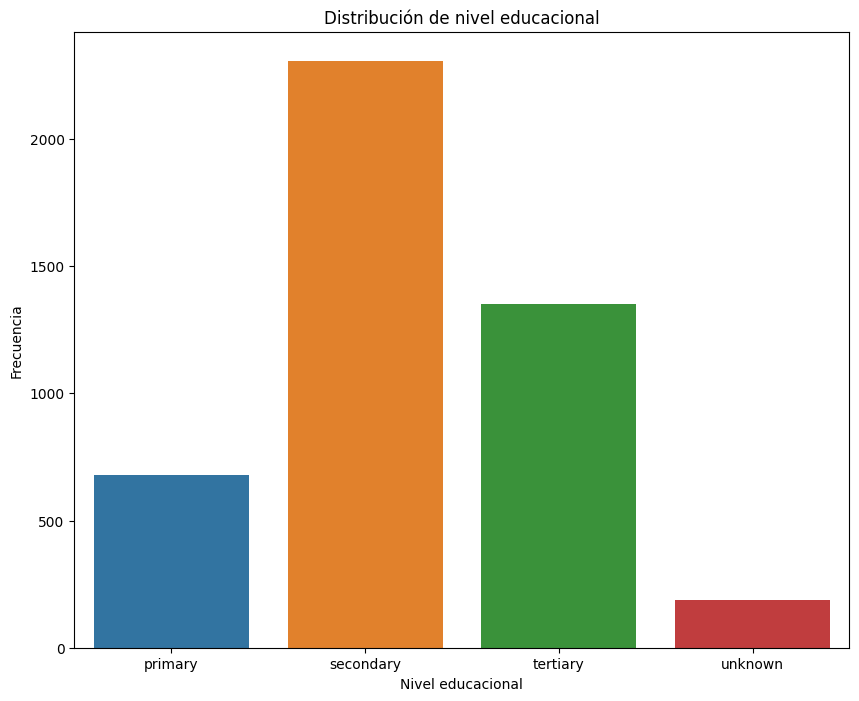

In [41]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='education')
plt.xlabel('Nivel educacional')
plt.ylabel('Frecuencia')
plt.title('Distribución de nivel educacional')
plt.show()

In [47]:
conteo_education = df['education'].value_counts()
print("Cantidad de gente graduada de primaria:", conteo_education[2])
print("Cantidad de gente graduada de secundaria:", conteo_education[0])
print("Cantidad de gente graduada de superior:", conteo_education[1])
print("Cantidad de gente con nivel educacional desconocido:", conteo_education[3])

Cantidad de gente graduada de primaria: 678
Cantidad de gente graduada de secundaria: 2306
Cantidad de gente graduada de superior: 1350
Cantidad de gente con nivel educacional desconocido: 187


Como se puede apreciar en el grafico, la gente tiende a quedar en un nivel educacional intermedio (secondary), por otro lado lo sigue la educacion superior y de ultimo estan la primaria y desconocido, por lo que se puede entender que gran parte de las personas tienden a estar entre secundaria y superior

# Mapa de calor

<ipython-input-51-89c501820ba3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe_seleccionado.corr()


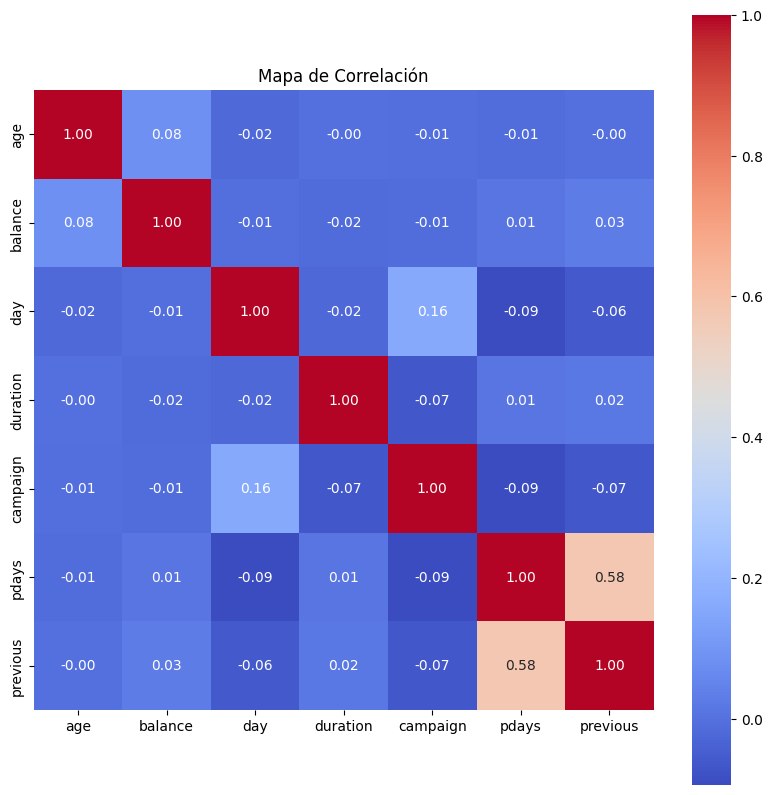

In [51]:
columnas_seleccionadas = [ 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
dataframe_seleccionado = df[columnas_seleccionadas]
correlation_matrix = dataframe_seleccionado.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Correlación')
plt.show()

Como se puede ver en el mapa de calor, las columnas con mayor correlacion son pdays y previous, esto se puede deber a que los dias de pago dependen mucho de cuando pago los creditos el mes anterior
# *NO SE AGREGARON MAS COLUMNAS AL MAPA DE CALOR PUESTO QUE SE REQUIERE QUE ESTAS SEAN DE VALOR NUMERICO*

Estos son los valores de las tablas antes de ser modificados

In [52]:
print(df.head(4600))

      age            job  marital  education default  balance housing loan  \
0      30     unemployed  married    primary      no     1787      no   no   
1      33       services  married  secondary      no     4789     yes  yes   
2      35     management   single   tertiary      no     1350     yes   no   
3      30     management  married   tertiary      no     1476     yes  yes   
4      59    blue-collar  married  secondary      no        0     yes   no   
...   ...            ...      ...        ...     ...      ...     ...  ...   
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous 

Modifico las tablas para poder trabajar con ellas de manera numerica y poder ingresarlas al mapa de calor

In [70]:
#Definir los numeros y letras a sus respectivas categorias
mapeo_marital = {'married':1,'single':2, 'divorced':3}
mapeo_education = {'primary':1, 'secundary':2,'tertiary':3, 'unknown':4}
mapeo_default = {'yes':1, 'no':2}
mapeo_housing = {'yes':1,'no':2}
mapeo_loan = {'yes':1,'no':2}
mapeo_contact = {'cellular':1, 'unknown':2}
mapeo_month = { 'jan':1,  'feb':2, 'mar':3, 'apr':4,'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11,'dec':12}
mapeo_poutcome = {'failure':1,'unknown':2,'other':3}
mapeo_y = {'yes':1,'no':2}

# Aplicar los cambios a sus respectivas categorias
df['marital'] = df['marital'].replace(mapeo_marital)
df['education'] = df['education'].replace(mapeo_education)
df['default'] = df['default'].replace(mapeo_default)
df['housing'] = df['housing'].replace(mapeo_housing)
df['loan'] = df['loan'].replace(mapeo_loan)
df['contact'] = df['contact'].replace(mapeo_contact)
df['month'] = df['month'].replace(mapeo_month)
df['poutcome'] = df['poutcome'].replace(mapeo_poutcome)
df['y'] = df['y'].replace(mapeo_y)

Una vez modificadas, revisamos que no tengan nulos

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   int64 
 3   education  4521 non-null   object
 4   default    4521 non-null   int64 
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   int64 
 7   loan       4521 non-null   int64 
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   int64 
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(13), object(4)
memory usage: 600.6+ KB


Revisamos la tabla nuevamente para ver si los cambios se realizaron

In [73]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,1,1,2,1787,2,2,1,19,10,79,1,-1,0,2,2
1,33,services,1,secondary,2,4789,1,1,1,11,5,220,1,339,4,1,2
2,35,management,2,3,2,1350,1,2,1,16,4,185,1,330,1,1,2
3,30,management,1,3,2,1476,1,1,2,3,6,199,4,-1,0,2,2
4,59,blue-collar,1,secondary,2,0,1,2,2,5,5,226,1,-1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,1,secondary,2,-333,1,2,1,30,7,329,5,-1,0,2,2
4517,57,self-employed,1,3,1,-3313,1,1,2,9,5,153,1,-1,0,2,2
4518,57,technician,1,secondary,2,295,2,2,1,19,8,151,11,-1,0,2,2
4519,28,blue-collar,1,secondary,2,1137,2,2,1,6,2,129,4,211,3,3,2


Muestro nuevamente el mapa de calor con las variables nuevas y cambiadas

<ipython-input-71-3141728ccea1>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataframe_seleccionado.corr()


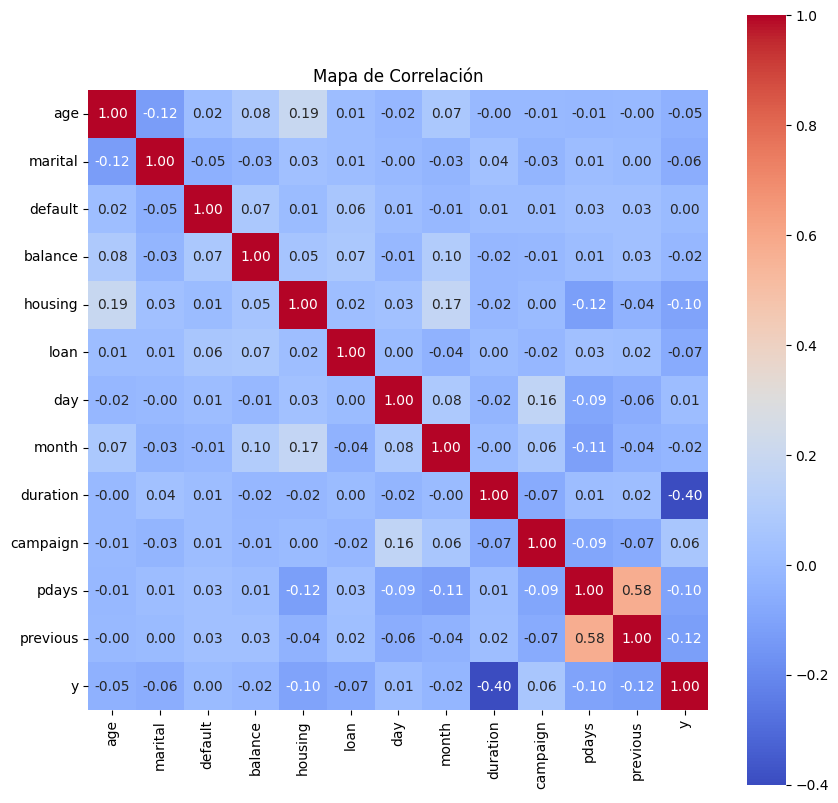

In [71]:
columnas_seleccionadas = ['age'	,'job',	'marital',	'education',	'default',	'balance',	'housing',	'loan',	'contact',	'day',	'month',	'duration',	'campaign',	'pdays',	'previous',	'poutcome',	'y']
dataframe_seleccionado = df[columnas_seleccionadas]
correlation_matrix = dataframe_seleccionado.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Mapa de Correlación')
plt.show()

Como se puede se puede apreciar en el mapa de calor la variable con mayor correlacion son pdays y previous, por otro lado duration e y tienen una relacion inversa